In [2]:
!pip install rouge-score


  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=7d9d0f570e597fab5cfb6150d7c02b2a3004f1907f02b330c942012e75572b46
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge-score


No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

Device set to use cpu


Summaries Generated:  [' Artificial intelligence (AI) is intelligence demonstrated by machines, as opposed to the natural intelligence displayed by humans and animals . Several subfields are linked to artificial intelligence, including robotics, natural language processing, and machine learning .', ' Artificial intelligence (AI) is intelligence demonstrated by machines, as opposed to the natural intelligence displayed by humans and animals . Several subfields are linked to artificial intelligence, including robotics, natural language processing, and machine learning .', ' Artificial intelligence (AI) is intelligence demonstrated by machines, as opposed to the natural intelligence displayed by humans and animals . Several subfields are linked to artificial intelligence, including robotics, natural language processing, and machine learning .']
ROUGE Scores (F-measure):  [[0.49230769 0.15873016 0.36923077]
 [0.49230769 0.15873016 0.36923077]
 [0.49230769 0.15873016 0.36923077]]
Normalized

<ipython-input-3-ac4d6395f828>:57: RuntimeWarning: invalid value encountered in divide
  topsis_scores = distance_to_negative_ideal / (distance_to_ideal + distance_to_negative_ideal)


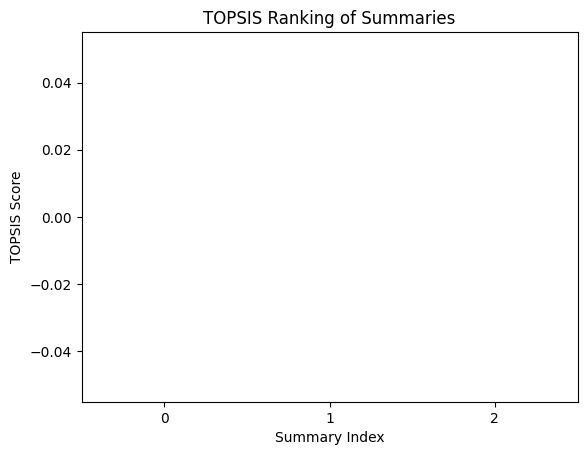


Ranked Summaries:
Summary 3:
 Artificial intelligence (AI) is intelligence demonstrated by machines, as opposed to the natural intelligence displayed by humans and animals . Several subfields are linked to artificial intelligence, including robotics, natural language processing, and machine learning .

Summary 2:
 Artificial intelligence (AI) is intelligence demonstrated by machines, as opposed to the natural intelligence displayed by humans and animals . Several subfields are linked to artificial intelligence, including robotics, natural language processing, and machine learning .

Summary 1:
 Artificial intelligence (AI) is intelligence demonstrated by machines, as opposed to the natural intelligence displayed by humans and animals . Several subfields are linked to artificial intelligence, including robotics, natural language processing, and machine learning .



In [3]:
import numpy as np
import matplotlib.pyplot as plt
from transformers import pipeline
from rouge_score import rouge_scorer
import seaborn as sns

# Initialize the pretrained model for text summarization
summarizer = pipeline("summarization")

# Sample input text for summarization
input_text = """
Artificial intelligence (AI) is intelligence demonstrated by machines, as opposed to the natural intelligence displayed by humans and animals.
Leading AI textbooks define the field as the study of "intelligent agents": any device that perceives its environment and takes actions that maximize its chance of successfully achieving its goals.
AI research is highly technical and specialized, and several subfields are linked to artificial intelligence, including robotics, natural language processing, and machine learning.
"""

# Generate multiple summaries (for the sake of this example, we'll generate 3)
summaries = [summarizer(input_text, max_length=50, min_length=25, do_sample=False)[0]['summary_text'] for _ in range(3)]
print("Summaries Generated: ", summaries)

# Reference summary for comparison
reference_summary = """
Artificial intelligence (AI) involves creating machines capable of intelligent behavior, such as perceiving their environment and acting to achieve goals.
This includes areas like machine learning, robotics, and natural language processing.
"""

# Define function to calculate ROUGE score
def calculate_rouge(summary, reference):
    scorer = rouge_scorer.RougeScorer(["rouge1", "rouge2", "rougeL"], use_stemmer=True)
    scores = scorer.score(reference, summary)
    return scores['rouge1'].fmeasure, scores['rouge2'].fmeasure, scores['rougeL'].fmeasure

# Evaluate each summary
rouge_scores = [calculate_rouge(summary, reference_summary) for summary in summaries]
rouge_scores = np.array(rouge_scores)
print("ROUGE Scores (F-measure): ", rouge_scores)

# Normalize the ROUGE scores (each row is a summary, and columns are ROUGE1, ROUGE2, ROUGE-L)
norm_scores = rouge_scores / rouge_scores.max(axis=0)
print("Normalized ROUGE Scores: ", norm_scores)

# Ideal and negative ideal solutions
ideal_solution = np.max(norm_scores, axis=0)
negative_ideal_solution = np.min(norm_scores, axis=0)

print("Ideal Solution: ", ideal_solution)
print("Negative Ideal Solution: ", negative_ideal_solution)

# Calculate Euclidean distance to ideal and negative ideal solutions
distance_to_ideal = np.linalg.norm(norm_scores - ideal_solution, axis=1)
distance_to_negative_ideal = np.linalg.norm(norm_scores - negative_ideal_solution, axis=1)

print("Distance to Ideal Solution: ", distance_to_ideal)
print("Distance to Negative Ideal Solution: ", distance_to_negative_ideal)

# Calculate TOPSIS score: Closer to ideal solution is better
topsis_scores = distance_to_negative_ideal / (distance_to_ideal + distance_to_negative_ideal)
ranked_summaries = np.argsort(topsis_scores)[::-1]

# Display the ranked summaries
print("Ranked Summaries (0 is best): ", ranked_summaries)

# Plot the TOPSIS scores for each summary
sns.barplot(x=np.arange(len(summaries)), y=topsis_scores)
plt.xlabel("Summary Index")
plt.ylabel("TOPSIS Score")
plt.title("TOPSIS Ranking of Summaries")
plt.show()

# Print the ranked summaries
print("\nRanked Summaries:")
for i in ranked_summaries:
    print(f"Summary {i+1}:\n{summaries[i]}\n")